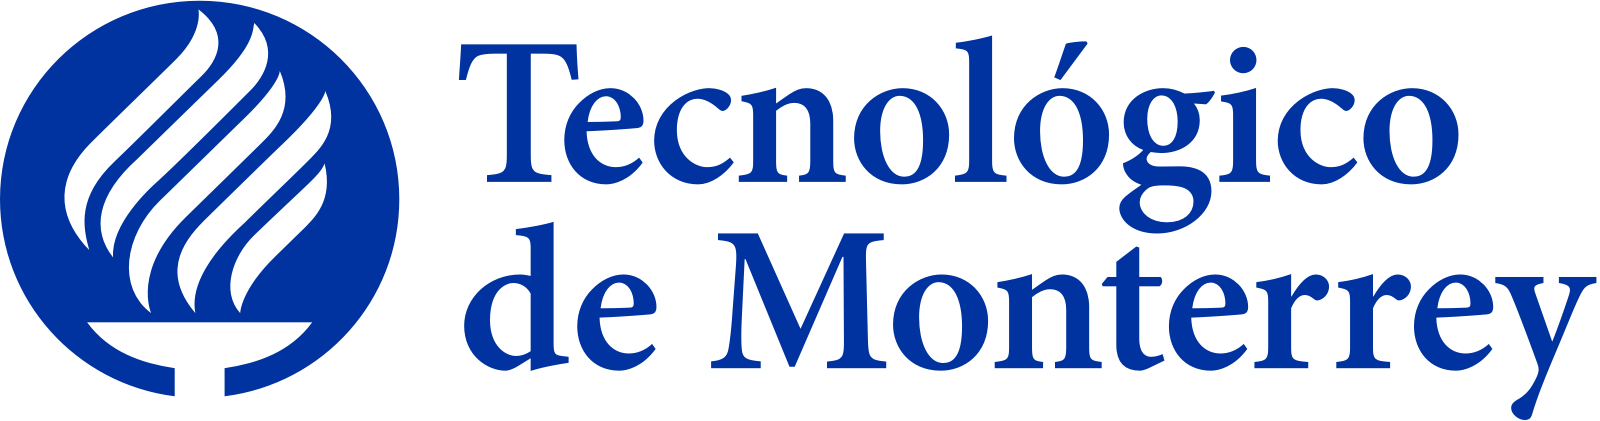

# **Master in Artificial Intelligence**

### Course: **Advanced Machine Learning Methods**

### Tecnológico de Monterrey

### Lead Professor José Antonio Cantoral Ceballos



## Team 38
*   A01794957 Tania Alicia Caballero Saavedra
*   A01283104 Kevin Dueñas Aguirre
*   A01794882 Francisco Marmolejo Martinez
*   A01795106 Francisco Javier Rupit Olvera
*   A01795093 Miguel Angel Alpizar Flores



# TC 5033
## Deep Learning
## Convolutional Neural Networks
<br>

#### Activity 2b: Building a CNN for CIFAR10 dataset with PyTorch
<br>

- Objective

    The main goal of this activity is to further your understanding of Convolutional Neural Networks (CNNs) by building one using PyTorch. You will apply this architecture to the famous CIFAR10 dataset, taking what you've learned from the guide code that replicated the Fully Connected model in PyTorch (Activity 2a).

- Instructions
    This activity requires submission in teams of 5 or 6 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Understand the Guide Code: Review the guide code from Activity 2a that implemented a Fully Connected model in PyTorch. Note how PyTorch makes it easier to implement neural networks.

    Familiarize Yourself with CNNs: Take some time to understand their architecture and the rationale behind using convolutional layers.

    Prepare the Dataset: Use PyTorch's DataLoader to manage the dataset. Make sure the data is appropriately preprocessed for a CNN.

    Design the CNN Architecture: Create a new architecture that incorporates convolutional layers. Use PyTorch modules like nn.Conv2d, nn.MaxPool2d, and others to build your network.

    Training Loop and Backpropagation: Implement the training loop, leveraging PyTorch’s autograd for backpropagation. Keep track of relevant performance metrics.

    Analyze and Document: Use Markdown cells to explain your architectural decisions, performance results, and any challenges you faced. Compare this model with your previous Fully Connected model in terms of performance and efficiency.

- Evaluation Criteria

    - Understanding of CNN architecture and its application to the CIFAR10 dataset
    - Code Readability and Comments
    - Appropriateness and efficiency of the chosen CNN architecture
    - Correct implementation of Traning Loop and Accuracy Function
    - Model's performance metrics on the CIFAR10 dataset (at least 65% accuracy)
    - Quality of Markdown documentation

- Submission

Submit via Canvas your Jupyter Notebook with the CNN implemented in PyTorch. Your submission should include well-commented code and Markdown cells that provide a comprehensive view of your design decisions, performance metrics, and learnings.

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torch.utils.data import sampler
import torchvision.datasets as datasets
import torchvision.transforms as T
import matplotlib.pyplot as plt
#only if you have jupyterthemes
#from jupyterthemes import jtplot
#jtplot.style()

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### Download Cifar10 dataset

In [3]:
torch.cuda.is_available()

True

In [4]:
DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/METDs/act2/cifar-10-batches-py' #Here I've added the route
NUM_TRAIN = 50000
NUM_VAL = 5000
NUM_TEST = 5000
MINIBATCH_SIZE = 64

transform_cifar = T.Compose([
                T.ToTensor(),
                T.Normalize([0.491, 0.482, 0.447], [0.247, 0.243, 0.261])
            ])

# Train dataset
cifar10_train = datasets.CIFAR10(DATA_PATH, train=True, download=True,
                             transform=transform_cifar)
train_loader = DataLoader(cifar10_train, batch_size=MINIBATCH_SIZE,
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))
#Validation set
cifar10_val = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                           transform=transform_cifar)
val_loader = DataLoader(cifar10_val, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL)))
#Test set
cifar10_test = datasets.CIFAR10(DATA_PATH, train=False, download=True,
                            transform=transform_cifar)
test_loader = DataLoader(cifar10_test, batch_size=MINIBATCH_SIZE,
                        sampler=sampler.SubsetRandomSampler(range(NUM_VAL, len(cifar10_test))))

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [5]:
cifar10_train

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/Colab Notebooks/ADV/act2/cifar-10-batches-py
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.261])
           )

In [6]:
train_loader.batch_size # Hacer un wrap de nuestro objeto para hacer los mini batches

64

In [7]:
for i, (x, y) in enumerate(train_loader):
    print(x, y)

Streaming output truncated to the last 5000 lines.

         [[ 9.0174e-01,  5.2611e-01,  6.0123e-01,  ...,  1.5178e+00,
            1.5178e+00,  1.5178e+00],
          [ 1.2774e+00,  1.4426e+00,  1.4727e+00,  ...,  1.3375e+00,
            1.3976e+00,  1.3825e+00],
          [ 1.4877e+00,  1.9084e+00,  1.8934e+00,  ...,  1.1572e+00,
            9.4681e-01,  1.0370e+00],
          ...,
          [ 1.2924e+00,  1.4877e+00,  9.7686e-01,  ...,  1.2022e+00,
            1.2774e+00,  1.2173e+00],
          [ 1.2323e+00,  1.5027e+00,  1.2774e+00,  ...,  3.4580e-01,
            4.3596e-01,  1.1121e+00],
          [ 1.1421e+00,  1.4426e+00,  1.1572e+00,  ...,  1.0971e+00,
            1.1121e+00,  1.3976e+00]]]]) tensor([8, 1, 9, 4, 5, 2, 8, 2, 6, 6, 8, 8, 5, 8, 9, 4, 0, 6, 0, 0, 6, 1, 3, 5,
        9, 7, 3, 2, 9, 2, 5, 7, 8, 7, 6, 9, 4, 7, 9, 1, 0, 6, 7, 1, 7, 1, 1, 1,
        3, 3, 6, 2, 3, 6, 8, 0, 5, 3, 1, 9, 2, 6, 2, 1])
tensor([[[[-6.2245e-01, -1.3027e-01, -1.6202e-01,  ..., -3.8430e-01,
  

### Using  GPUs

In [8]:
if torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
print(device)

cuda


### Mostrar imágenes

La imagen muestreada representa un: ship


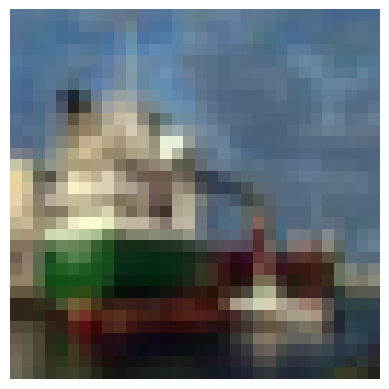

In [9]:
classes = test_loader.dataset.classes
def plot_figure(image):
    plt.imshow(np.transpose(image,(1,2,0)))
    plt.axis('off')
    plt.show()

rnd_sample_idx = np.random.randint(len(test_loader))
print(f'La imagen muestreada representa un: {classes[test_loader.dataset[rnd_sample_idx][1]]}')
image = test_loader.dataset[rnd_sample_idx][0]
image = (image - image.min()) / (image.max() -image.min() )
plot_figure(image)


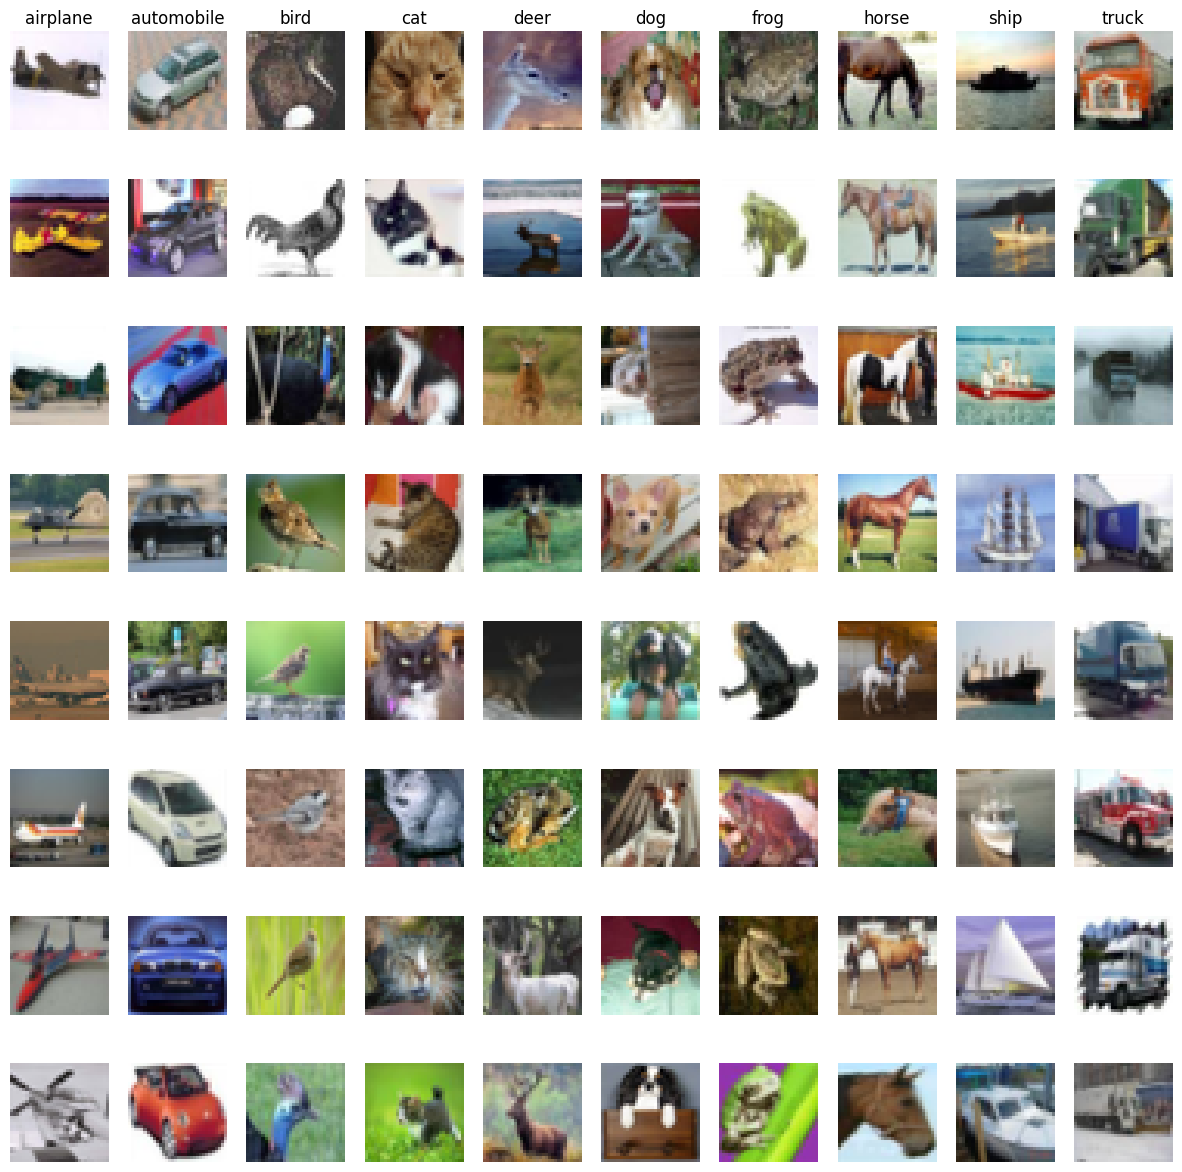

In [10]:
def plot_cifar10_grid():
    classes = test_loader.dataset.classes
    total_samples = 8
    plt.figure(figsize=(15,15))
    for label, sample in enumerate(classes):
        class_idxs = np.flatnonzero(label == np.array(test_loader.dataset.targets))
        sample_idxs = np.random.choice(class_idxs, total_samples, replace = False)
        for i, idx in enumerate(sample_idxs):
            plt_idx = i*len(classes) + label + 1
            plt.subplot(total_samples, len(classes), plt_idx)
            plt.imshow(test_loader.dataset.data[idx])
            plt.axis('off')

            if i == 0: plt.title(sample)
    plt.show()

plot_cifar10_grid()

### Calcular accuracy


In [11]:
for i, (x,y) in enumerate(test_loader):
  print(i, x.shape, y.shape)

0 torch.Size([64, 3, 32, 32]) torch.Size([64])
1 torch.Size([64, 3, 32, 32]) torch.Size([64])
2 torch.Size([64, 3, 32, 32]) torch.Size([64])
3 torch.Size([64, 3, 32, 32]) torch.Size([64])
4 torch.Size([64, 3, 32, 32]) torch.Size([64])
5 torch.Size([64, 3, 32, 32]) torch.Size([64])
6 torch.Size([64, 3, 32, 32]) torch.Size([64])
7 torch.Size([64, 3, 32, 32]) torch.Size([64])
8 torch.Size([64, 3, 32, 32]) torch.Size([64])
9 torch.Size([64, 3, 32, 32]) torch.Size([64])
10 torch.Size([64, 3, 32, 32]) torch.Size([64])
11 torch.Size([64, 3, 32, 32]) torch.Size([64])
12 torch.Size([64, 3, 32, 32]) torch.Size([64])
13 torch.Size([64, 3, 32, 32]) torch.Size([64])
14 torch.Size([64, 3, 32, 32]) torch.Size([64])
15 torch.Size([64, 3, 32, 32]) torch.Size([64])
16 torch.Size([64, 3, 32, 32]) torch.Size([64])
17 torch.Size([64, 3, 32, 32]) torch.Size([64])
18 torch.Size([64, 3, 32, 32]) torch.Size([64])
19 torch.Size([64, 3, 32, 32]) torch.Size([64])
20 torch.Size([64, 3, 32, 32]) torch.Size([64])
21

In [12]:
def accuracy(model, loader):
    num_correct = 0 #We define a counter for the correct predictions
    num_total = 0 #total of predictions
    model.eval()  #  Switches the model to evaluation mode (disables dropout, batch norm, etc.)
    model = model.to(device=device) # we pass this model to be used in the GPU ( if available)

    with torch.no_grad():  #  Disables the gradient calc for faster evaluation
        for xi, yi in loader:  # Loops within the batchs of dataloader
            xi = xi.to(device=device, dtype=torch.float32) # Moves input data to device and sets de data type to Float
            yi = yi.to(device=device, dtype=torch.long) # Moves labes to device and sets de data type to Float

            scores = model(xi)  ## Forward pass: model predicts the output for inputs(raw scores)
            _, pred = scores.max(dim=1)  # Gets the predicted class (index of the max score)

            num_correct += (pred == yi).sum()  #Counts the number of accurate predictions
            num_total += pred.size(0)  # counts the number of total esamples

    return float(num_correct) / num_total  # Final accuracy as a float


### Loop de entrenamiento

In [13]:

def train(model, optimiser, epochs=100):
    model = model.to(device=device) # we pass this model to be used in the GPU ( if available)
    for epoch in range(epochs): # Loops through the specified number of epochs
        for i, (xi, yi) in enumerate(train_loader): # Iterates through batches in the training data loader
            model.train() # Sets the model to training mode (enables dropout, batch norm, etc.)
            xi = xi.to(device=device, dtype=torch.float32) # Moves input data to device and sets de data type to Float
            yi = yi.to(device=device, dtype=torch.long) # Moves labes to device and sets de data type to Float
            scores = model(xi) # Forward pass: model predicts the output for inputs
            cost = F.cross_entropy(input= scores, target=yi) # Computes the cross-entropy loss
            optimiser.zero_grad() # Clears previous gradients
            cost.backward()  #Backward pass: computes the gradients for each parameter
            optimiser.step() ## Updates model parameters based on the computed gradients
        acc = accuracy(model, val_loader) # Calls the accuracy function to evaluate on validation data
        print(f'Epoch: {epoch}, costo: {cost.item()}, accuracy: {acc},') # Prints the epoch, cost, and accuracy

### Linear model

In [14]:
# To do: Use PyTorch to create a linear model to have an initial baseline model
hidden1 = 256  # We define the number of neurons for the first layer
hidden = 256 # We define the number of neurons for the second layer
lr = 0.001  # We set the Learning rate
epochs = 10 # We set the number of epochs
model1 = nn.Sequential(nn.Flatten(), # A simple Neutal network model is created with the use of nn.Sequential,  then  we flatten the multidimensional matrix into 1 dimension
                       nn.Linear(in_features=32*32*3, out_features=hidden1), nn.ReLU(),  # First linear layer with ReLU activation
                       nn.Linear(in_features=hidden1, out_features=hidden), nn.ReLU(), # Second linear layer with ReLU activation
                       nn.Linear(in_features=hidden, out_features=10))  # Output layer with 10 classes
optimiser = torch.optim.Adam(model1.parameters(), lr=lr) # Defines the optimizer (Adam) for training the model, using the model's parameters

In [15]:
train(model1,optimiser,epochs)

Epoch: 0, costo: 1.4175119400024414, accuracy: 0.4768,
Epoch: 1, costo: 1.757717490196228, accuracy: 0.5002,
Epoch: 2, costo: 1.5025393962860107, accuracy: 0.5096,
Epoch: 3, costo: 1.1452068090438843, accuracy: 0.5284,
Epoch: 4, costo: 0.8512812256813049, accuracy: 0.531,
Epoch: 5, costo: 1.151395320892334, accuracy: 0.5362,
Epoch: 6, costo: 1.2479443550109863, accuracy: 0.5368,
Epoch: 7, costo: 1.8233225345611572, accuracy: 0.5166,
Epoch: 8, costo: 0.9091822504997253, accuracy: 0.536,
Epoch: 9, costo: 0.8278632760047913, accuracy: 0.539,


### Sequential CNN

In [16]:
# To do: Use PyTorch to implement a CNN model, accuracy should be better than
#the linear model
#We have created 5 CNN with different Hyperparameters to evaluate which one has a higher accuracy and lower cost
channel1 = 16 # Define  number of filters for  first layer
channel2 = 32 # Define  number of filters for  second layer
epochs = 10  # Define  number of epochs for  first layer
lr = 0.0001 # Learning rate deffined
modelCNN1 = nn.Sequential(nn.Conv2d(in_channels=3, out_channels=channel1, # First conv layer (3 input channels for RGB, 16 output channels, 3x3 kernel)
                                   kernel_size=3, padding=1),
                          nn.ReLU(), #Apply ReLu activation after the first layer
                          nn.Conv2d(in_channels=channel1, out_channels=channel2, # Second conv layer (16 input, 32 output, 3x3 kernel) With ReLU
                                    kernel_size= 3, padding=1),
                          nn.ReLU(),#Apply ReLu activation after the second layer
                          nn.MaxPool2d(2, 2),  # Max pooling to downsample the feature maps (2x2 pool size)
                          nn.Flatten(), # Flatten the 2D feature maps into a 1D vector for the fully connected laye
                          nn.Linear(in_features=16*16*channel2, out_features=10) # Fully connected layer (16x16x32 input, 10 output classes)
)

                                # Define the Adam optimizer for the model's parameters with the specified learning rate
optimiser = torch.optim.Adam(modelCNN1.parameters(), lr)

In [17]:
#Results of Model 1
train(modelCNN1, optimiser, epochs)

Epoch: 0, costo: 1.7384299039840698, accuracy: 0.493,
Epoch: 1, costo: 1.6147730350494385, accuracy: 0.5324,
Epoch: 2, costo: 1.182364821434021, accuracy: 0.5578,
Epoch: 3, costo: 1.287561297416687, accuracy: 0.5814,
Epoch: 4, costo: 1.3586558103561401, accuracy: 0.5928,
Epoch: 5, costo: 1.0896822214126587, accuracy: 0.606,
Epoch: 6, costo: 0.9239923357963562, accuracy: 0.61,
Epoch: 7, costo: 0.880121111869812, accuracy: 0.627,
Epoch: 8, costo: 1.0469226837158203, accuracy: 0.6232,
Epoch: 9, costo: 1.17597234249115, accuracy: 0.6284,


In [18]:
# MODEL number 2: Added an extra convolutional layer and increased the number of filters

channel1 = 32  # Number of filters for the first conv layer
channel2 = 64  # Number of filters for the second conv layer
channel3 = 128  # Number of filters for the third conv layer
epochs = 10  # Set the number of training epochs
lr = 0.0001  # Learning rate for the optimizer

# Define the CNN model using nn.Sequential
modelCNN2 = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=channel1, kernel_size=3, padding=1),  # First conv layer (32 filters)
    nn.ReLU(),  # ReLU activation function after the first conv layer
    nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=3, padding=1),  # Second conv layer (64 filters)
    nn.ReLU(),  # ReLU activation after the second conv layer
    nn.Conv2d(in_channels=channel2, out_channels=channel3, kernel_size=3, padding=1),  # Third conv layer (128 filters)
    nn.ReLU(),  # ReLU activation after the third conv layer
    nn.MaxPool2d(2, 2),  # Max pooling layer (2x2 pool size), reducing spatial dimensions
    nn.Flatten(),  # Flatten the output to prepare for the fully connected layer
    nn.Linear(in_features=16*16*channel3, out_features=10)  # Fully connected layer (output layer with 10 classes)
)

# Define the Adam optimizer for the model's parameters with the specified learning rate
optimiser = torch.optim.Adam(modelCNN2.parameters(), lr)

In [19]:
#Results of Model 2
train(modelCNN2, optimiser, epochs)

Epoch: 0, costo: 1.5619025230407715, accuracy: 0.5574,
Epoch: 1, costo: 0.6737247705459595, accuracy: 0.6056,
Epoch: 2, costo: 1.3075299263000488, accuracy: 0.6404,
Epoch: 3, costo: 0.9270585179328918, accuracy: 0.6674,
Epoch: 4, costo: 0.7604185938835144, accuracy: 0.6774,
Epoch: 5, costo: 1.0743167400360107, accuracy: 0.6874,
Epoch: 6, costo: 0.7297690510749817, accuracy: 0.6828,
Epoch: 7, costo: 0.7104688286781311, accuracy: 0.6958,
Epoch: 8, costo: 0.7692792415618896, accuracy: 0.704,
Epoch: 9, costo: 0.23803198337554932, accuracy: 0.6894,


In [20]:
# MODEL 3: Adjusted the learning rate to 0.0002 for experimentation

channel1 = 32  # Number of filters for the first conv layer
channel2 = 64  # Number of filters for the second conv layer
channel3 = 128  # Number of filters for the third conv layer
epochs = 10  # Set the number of training epochs
lr = 0.0002  # Increased learning rate for this model

# Define the CNN model using nn.Sequential
modelCNN3 = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=channel1, kernel_size=3, padding=1),  # First conv layer with 32 filters
    nn.ReLU(),  # ReLU activation after the first conv layer
    nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=3, padding=1),  # Second conv layer with 64 filters
    nn.ReLU(),  # ReLU activation after the second conv layer
    nn.Conv2d(in_channels=channel2, out_channels=channel3, kernel_size=3, padding=1),  # Third conv layer with 128 filters
    nn.ReLU(),  # ReLU activation after the third conv layer
    nn.MaxPool2d(2, 2),  # Max pooling layer to downsample the feature maps
    nn.Flatten(),  # Flatten the output for the fully connected layer
    nn.Linear(in_features=16*16*channel3, out_features=10)  # Fully connected output layer (10 classes)
)

# Define the Adam optimizer with an increased learning rate (0.0002)
optimiser = torch.optim.Adam(modelCNN3.parameters(), lr)

In [21]:
#Results of Model 3
train(modelCNN3, optimiser, epochs)

Epoch: 0, costo: 1.1241177320480347, accuracy: 0.6196,
Epoch: 1, costo: 1.4110231399536133, accuracy: 0.6546,
Epoch: 2, costo: 0.4907882809638977, accuracy: 0.6766,
Epoch: 3, costo: 0.7071534395217896, accuracy: 0.7046,
Epoch: 4, costo: 0.7854781746864319, accuracy: 0.699,
Epoch: 5, costo: 0.6398335695266724, accuracy: 0.7118,
Epoch: 6, costo: 0.21982702612876892, accuracy: 0.704,
Epoch: 7, costo: 0.28791916370391846, accuracy: 0.7082,
Epoch: 8, costo: 0.1414492279291153, accuracy: 0.7042,
Epoch: 9, costo: 0.20682048797607422, accuracy: 0.7042,


In [22]:
# MODEL 4: Increased the number of filters for each convolutional layer

channel1 = 64  # Number of filters for the first conv layer
channel2 = 128  # Number of filters for the second conv layer
channel3 = 256  # Number of filters for the third conv layer
epochs = 10  # Set the number of training epochs
lr = 0.0001  # Learning rate for the optimizer

# Define the CNN model using nn.Sequential
modelCNN4 = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=channel1, kernel_size=3, padding=1),  # First conv layer with 64 filters
    nn.ReLU(),  # ReLU activation after the first conv layer
    nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=3, padding=1),  # Second conv layer with 128 filters
    nn.ReLU(),  # ReLU activation after the second conv layer
    nn.Conv2d(in_channels=channel2, out_channels=channel3, kernel_size=3, padding=1),  # Third conv layer with 256 filters
    nn.ReLU(),  # ReLU activation after the third conv layer
    nn.MaxPool2d(2, 2),  # Max pooling layer to downsample feature maps by half
    nn.Flatten(),  # Flatten the output for the fully connected layer
    nn.Linear(in_features=16*16*channel3, out_features=10)  # Fully connected output layer (10 classes)
)

# Define the Adam optimizer for updating model weights with the learning rate of 0.0001
optimiser = torch.optim.Adam(modelCNN4.parameters(), lr)

In [23]:
#Results of Model 4
train(modelCNN4, optimiser, epochs)

Epoch: 0, costo: 1.3796451091766357, accuracy: 0.5844,
Epoch: 1, costo: 0.9982513189315796, accuracy: 0.658,
Epoch: 2, costo: 0.9133540391921997, accuracy: 0.6818,
Epoch: 3, costo: 0.38009271025657654, accuracy: 0.7016,
Epoch: 4, costo: 1.0486096143722534, accuracy: 0.7038,
Epoch: 5, costo: 0.966835618019104, accuracy: 0.6966,
Epoch: 6, costo: 0.7163932919502258, accuracy: 0.7188,
Epoch: 7, costo: 0.7045260071754456, accuracy: 0.721,
Epoch: 8, costo: 0.37859678268432617, accuracy: 0.7154,
Epoch: 9, costo: 0.7160078287124634, accuracy: 0.715,


In [24]:
# MODEL 5: Introduced Batch Normalization and Dropout for regularization

channel1 = 64  # Number of filters for the first conv layer
channel2 = 128  # Number of filters for the second conv layer
channel3 = 256  # Number of filters for the third conv layer
epochs = 10  # Set the number of training epochs
lr = 0.0001  # Learning rate for the optimizer

# Define the CNN model using nn.Sequential
modelCNN5 = nn.Sequential(
    nn.Conv2d(in_channels=3, out_channels=channel1, kernel_size=3, padding=1),  # First conv layer with 64 filters
    nn.BatchNorm2d(channel1),  # Apply batch normalization to the output of the first conv layer
    nn.ReLU(),  # ReLU activation after batch normalization
    nn.MaxPool2d(2, 2),  # Max pooling to downsample the feature maps (reduce spatial dimensions)

    nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=3, padding=1),  # Second conv layer with 128 filters
    nn.BatchNorm2d(channel2),  # Batch normalization after the second conv layer
    nn.ReLU(),  # ReLU activation after batch normalization
    nn.MaxPool2d(2, 2),  # Max pooling after the second conv layer

    nn.Conv2d(in_channels=channel2, out_channels=channel3, kernel_size=3, padding=1),  # Third conv layer with 256 filters
    nn.BatchNorm2d(channel3),  # Batch normalization after the third conv layer
    nn.ReLU(),  # ReLU activation after batch normalization
    nn.MaxPool2d(2, 2),  # Max pooling after the third conv layer, reducing feature maps to 4x4

    nn.Flatten(),  # Flatten the output from conv layers for the fully connected layer
    nn.Linear(in_features=4*4*channel3, out_features=512),  # Fully connected layer with 512 neurons
    nn.ReLU(),  # ReLU activation after the fully connected layer
    nn.Dropout(0.5),  # Dropout layer with 50% probability to prevent overfitting
    nn.Linear(in_features=512, out_features=10)  # Output layer with 10 neurons for the 10 classes
)

# Define the Adam optimizer with a learning rate of 0.0001
optimiser = torch.optim.Adam(modelCNN5.parameters(), lr)


In [25]:
#Results of Model 5, here we can see how after introducingf Batch Normalization and Droupout to avoid overfitting, our model increased up to .78 of accuraccy
train(modelCNN5, optimiser, epochs)

Epoch: 0, costo: 1.1976935863494873, accuracy: 0.6584,
Epoch: 1, costo: 0.4450877606868744, accuracy: 0.6908,
Epoch: 2, costo: 0.9583073258399963, accuracy: 0.7228,
Epoch: 3, costo: 0.5317459106445312, accuracy: 0.7358,
Epoch: 4, costo: 1.0313323736190796, accuracy: 0.7356,
Epoch: 5, costo: 1.167507290840149, accuracy: 0.7478,
Epoch: 6, costo: 0.6293802857398987, accuracy: 0.7668,
Epoch: 7, costo: 0.8074002861976624, accuracy: 0.7628,
Epoch: 8, costo: 0.5603262186050415, accuracy: 0.766,
Epoch: 9, costo: 0.4720383286476135, accuracy: 0.7762,


In [32]:
# Define the number of channels for each convolutional layer
channel1 = 64
channel2 = 128
channel3 = 256
channel4 = 512
channel5 = 1024
channel6 = 2048
channel7 = 4098

# Set the number of epochs and learning rate
epochs = 10
lr = 0.0001

# Build the CNN model using nn.Sequential
modelCNN6 = nn.Sequential(
    # First convolutional layer: 3 input channels (RGB), 64 output channels, 5x5 kernel size, padding of 2
    nn.Conv2d(in_channels=3, out_channels=channel1, kernel_size=5, padding=2),
    nn.ReLU(),  # Apply ReLU activation function

    # Second convolutional layer: 64 input channels, 128 output channels, 5x5 kernel size, padding of 2
    nn.Conv2d(in_channels=channel1, out_channels=channel2, kernel_size=5, padding=2),
    nn.ReLU(),  # Apply ReLU activation function
    nn.MaxPool2d(2, 2),  # Max pooling with a 2x2 window, reduces input size by half

    # Third convolutional layer: 128 input channels, 256 output channels, 5x5 kernel size, padding of 2
    nn.Conv2d(in_channels=channel2, out_channels=channel3, kernel_size=5, padding=2),
    nn.ReLU(),  # Apply ReLU activation function

    # Fourth convolutional layer: 256 input channels, 512 output channels, 3x3 kernel size, padding of 1
    nn.Conv2d(in_channels=channel3, out_channels=channel4, kernel_size=3, padding=1),
    nn.ReLU(),  # Apply ReLU activation function

    # Fifth convolutional layer: 512 input channels, 1024 output channels, 3x3 kernel size, padding of 1
    nn.Conv2d(in_channels=channel4, out_channels=channel5, kernel_size=3, padding=1),
    nn.ReLU(),  # Apply ReLU activation function
    nn.MaxPool2d(2, 2),  # Max pooling reduces the input size again by half

    # Sixth convolutional layer: 1024 input channels, 2048 output channels, 3x3 kernel size, padding of 1
    nn.Conv2d(in_channels=channel5, out_channels=channel6, kernel_size=3, padding=1),
    nn.ReLU(),  # Apply ReLU activation function

    # Seventh convolutional layer: 2048 input channels, 4098 output channels, 3x3 kernel size, padding of 1
    nn.Conv2d(in_channels=channel6, out_channels=channel7, kernel_size=3, padding=1),
    nn.ReLU(),  # Apply ReLU activation function
    nn.MaxPool2d(2, 2),  # Final max pooling layer reduces the size of the feature maps

    # Flatten the output of the last layer to feed into the fully connected layer
    nn.Flatten(),

    # Fully connected layer: input size is 4*4*4098 (based on previous pooling and channel size), output size is 10 (for 10 classes)
    nn.Linear(in_features=4*4*channel7, out_features=10)
)

# Define the optimizer: Adam optimizer with a learning rate of 0.0001
optimiser = torch.optim.Adam(modelCNN6.parameters(), lr)


In [27]:
#Results of Model 5.
train(modelCNN6, optimiser, epochs)

Epoch: 0, costo: 0.8040649890899658, accuracy: 0.6174,
Epoch: 1, costo: 1.0702544450759888, accuracy: 0.7024,
Epoch: 2, costo: 0.8335825204849243, accuracy: 0.7436,
Epoch: 3, costo: 0.34312084317207336, accuracy: 0.7708,
Epoch: 4, costo: 0.23058214783668518, accuracy: 0.7884,
Epoch: 5, costo: 0.3148241937160492, accuracy: 0.7944,
Epoch: 6, costo: 0.1696605533361435, accuracy: 0.794,
Epoch: 7, costo: 0.0711863711476326, accuracy: 0.804,
Epoch: 8, costo: 0.02106168307363987, accuracy: 0.793,
Epoch: 9, costo: 0.012700307182967663, accuracy: 0.8068,


## Conclusion:

Our best model yet was Model # 6 with 7 layer, reaching .80 of acurracy and a cost of .012
By increasing the number of channels in the CNN model, we allow the network to learn more complex and detailed feature representations at each convolutional layer. Larger channel sizes mean that each layer can capture more abstract and higher-level features from the input image.

 This helps improve the model's capacity to learn intricate patterns, leading to better performance on complex tasks like image classification.

In this case, adding more channels (and layers) enabled the model to better capture the features of your dataset, thus improving accuracy. However, it's important to balance this with computational cost and overfitting risk. ( In this case, it did took longer hence, more resources to process this model.
